## Objective :
Verifying the claim that over 5 million Nigerian youths are addicted to cigarette smoking.

The Current Population of Nigeria is 228,988,147 as of Sunday, June 23 2024, based on Worldometer elaboration of the latest United Nations data.

According to the United Nations Population Division, approximately 19.8% of Nigeria's population falls within the 15-24 age range.


In [2]:
# Import Libraries

import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('nigeria_smoking_data.csv')
df

,Participant ID,Age,Gender,Location,Education Level,Employment Status,Smoking Status,Age at Initiation,Frequency of Smoking per day,Type of Tobacco Product,Perceived Health Status,Awareness of Health Risks,Reasons for Smoking,Intent to Quit,Previous Quit Attempts,Access to Cessation Support,Influence of Advertising,Cost of Smoking per month,Economic Status
0,1,19,Male,Lagos,Secondary,Student,Current,16,5,Cigarettes,Good,Yes,Social influence,No,0.0,Yes,High,15.0,Low
1,2,23,Female,Abuja,Tertiary,Employed,Former,18,0,E-cigarettes,Very Good,Yes,Stress relief,Yes,2.0,No,Low,20.0,Medium
2,3,22,Male,Kano,Secondary,Unemployed,Current,17,10,Cigarettes,Fair,No,Addiction,No,3.0,Yes,Medium,30.0,Low
3,4,18,Female,Port Harcourt,Secondary,Student,Never,0,0,NaN,Excellent,Yes,NaN,Yes,0.0,No,Low,0.0,Medium
4,5,20,Male,Enugu,Tertiary,Student,Current,19,3,Shisha,Good,No,Social influence,Yes,1.0,No,High,25.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,20,Female,Abuja,Primary,Student,Current,16,6,E-cigarettes,Poor,Yes,Stress relief,Yes,3.0,Yes,High,28.0,Low
206,207,24,Male,Kano,Secondary,Employed,Former,17,0,Cigarettes,Fair,Yes,Addiction,No,1.0,No,Low,0.0,High
207,208,19,Female,Port Harcourt,Tertiary,Student,Current,15,0,Shisha,Fair,Yes,Peer pressure,Yes,0.0,Yes,Low,0.0,High
208,209,22,Male,Lagos,Primary,Unemployed,Current,17,8,E-cigarettes,Good,Yes,Addiction,Yes,2.0,Yes,High,30.0,Low


In [4]:
df1 = df.loc[:,['Age','Smoking Status']]
df1

,Age,Smoking Status
0,19,Current
1,23,Former
2,22,Current
3,18,Never
4,20,Current
...,...,...
205,20,Current
206,24,Former
207,19,Current
208,22,Current


In [5]:
df1 = df1[(df1['Age'] >= 15) & (df1['Age']<= 24)]
df1

,Age,Smoking Status
0,19,Current
1,23,Former
2,22,Current
3,18,Never
4,20,Current
...,...,...
205,20,Current
206,24,Former
207,19,Current
208,22,Current


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Binanry Encoding for Smoking Status

df1['Smoking Status']= df1['Smoking Status'].map({'Current': 1, 'Former': 0, 'Never': 0 })

df1

C:\Users\user\AppData\Local\Temp\ipykernel_2748\1374714827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Smoking Status']= df1['Smoking Status'].map({'Current': 1, 'Former': 0, 'Never': 0 })


,Age,Smoking Status
0,19,1
1,23,0
2,22,1
3,18,0
4,20,1
...,...,...
205,20,1
206,24,0
207,19,1
208,22,1


In [7]:
smoking_proportion = df1['Smoking Status'].mean()

print(f"Proportion of smokers in the sample:{smoking_proportion: .2%}")

Proportion of smokers in the sample: 47.37%


In [8]:

#Calculating the total number of youth given the percentage is approximately 19.8%

total_population = 228988147
youth_percentage = 0.198

total_youth_population = youth_percentage * total_population

print(f"Total youth population:{total_youth_population: .0f}")



Total youth population: 45339653


In [9]:
# Estimated number of smokers

total_youth_population = 45339653

estimated_smokers = smoking_proportion * total_youth_population
print(f"Estimated number of smokers:{estimated_smokers: .0f}")

Estimated number of smokers: 21476678


In [10]:
# Hypothesis Testing

# Null Hypotheses: The proportion of smokers is not greater than 5 million

# Alternative Hypothesis: The proportion of smokers is greater than 5 million

smokers_needed = 5000000
sample_size = len(df1)

# Perform the Z-test

count = df1['Smoking Status'].sum()
proportion = smokers_needed / total_youth_population

stat, p_value = proportions_ztest(count, sample_size, value= proportion, alternative= 'larger')

print(f"Z-statistic: {stat: .2f}, P-value: {p_value: .5f}")

Z-statistic:  10.52, P-value:  0.00000


In [11]:
# Confidence Interval

conf_int = sm.stats.proportion_confint(count, sample_size, alpha=0.05, method= 'normal')
lower_bound = conf_int[0] * total_youth_population
upper_bound = conf_int[1] * total_youth_population

print(f"95% Confidence interval for the proportion of smokers: {conf_int}")
print(f"95% Confidence interval for the number of smokers: [{lower_bound: .0f}, {upper_bound: .0f}]")

95% Confidence interval for the proportion of smokers: (0.40599139129304107, 0.5413770297595905)
95% Confidence interval for the number of smokers: [ 18407509,  24545847]


## Visualization

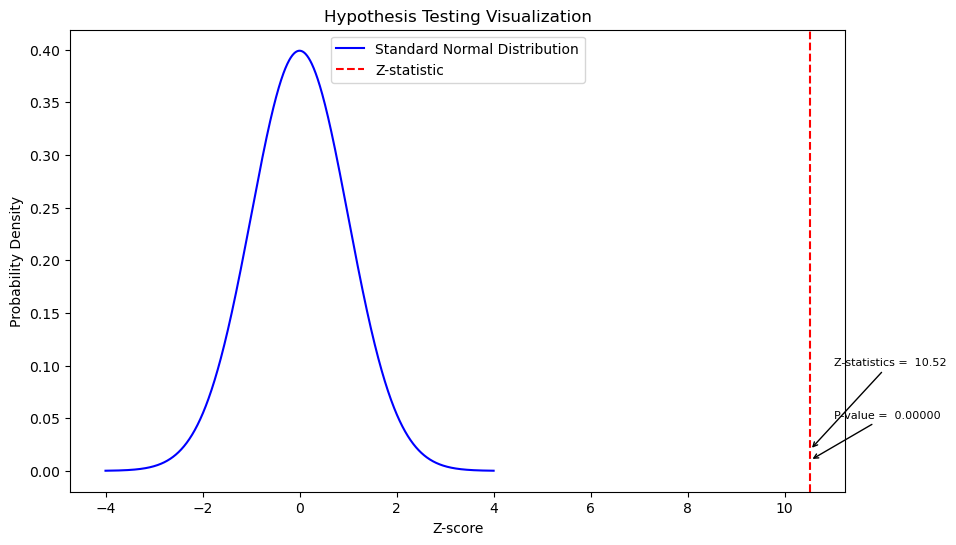

In [13]:
# Creating the figure and axis

fig, ax = plt.subplots(figsize=(10, 6))

# plotting the hypothesis testing results

x_values = np.linspace(-4, 4, 1000)
y_values = stats.norm.pdf(x_values)
ax.plot(x_values, y_values, color='blue', label= 'Standard Normal Distribution')
ax.fill_between(x_values[x_values > stat], y_values[x_values > stat], color= 'lightblue', alpha= 0.5)
ax.axvline(stat, color= 'red', linestyle='--', label='Z-statistic')



# Annotate the Z-statistic and P-value

ax.annotate(f"Z-statistics = {stat: .2f}", xy = (stat, 0.02), xytext=(stat + 0.5, 0.1),
           
arrowprops= dict(facecolor= 'black', arrowstyle= '->'), fontsize = 8)

ax.annotate(f"P-value = {p_value: .5f}", xy = (stat, 0.01), xytext=(stat + 0.5, 0.05),
           
arrowprops= dict(facecolor= 'black', arrowstyle= '->'), fontsize= 8)

# Set Labels and Title

ax.set_xlabel('Z-score')
ax.set_ylabel('Probability Density')
ax.set_title('Hypothesis Testing Visualization')

ax.legend()

plt.show()


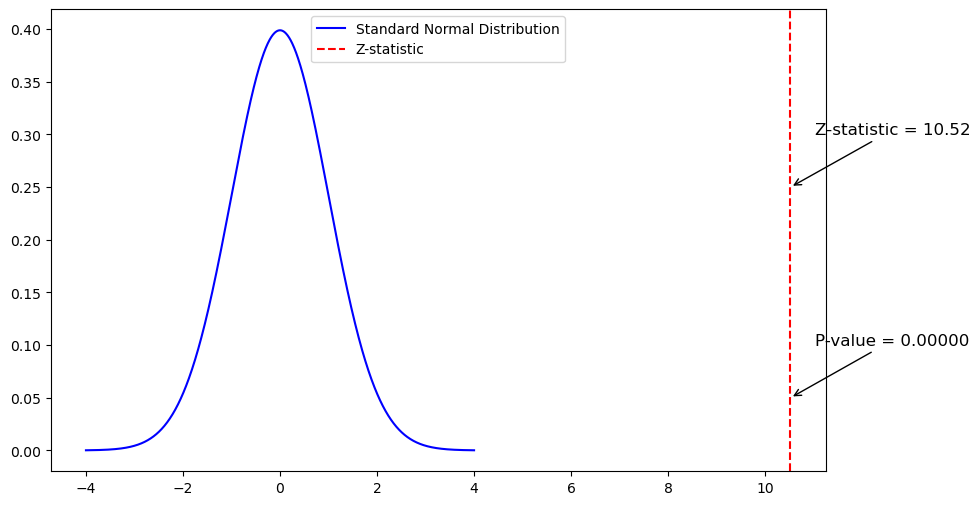

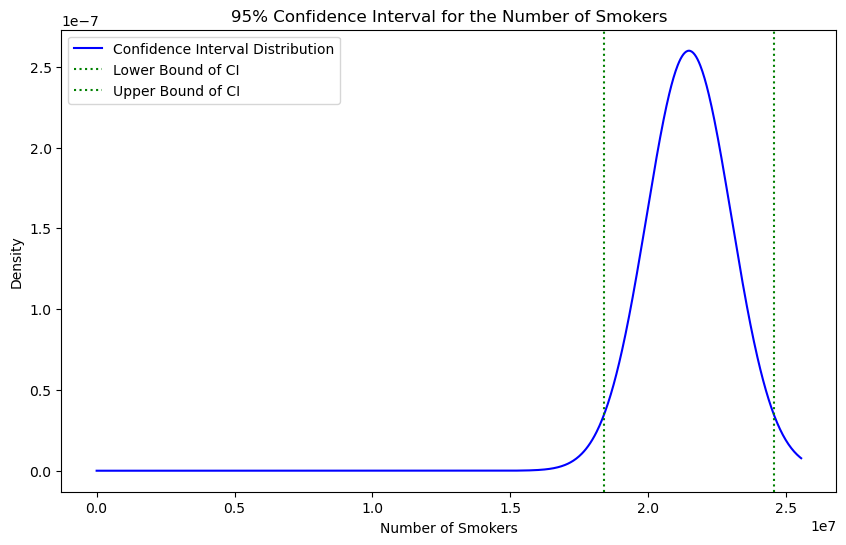

In [14]:



# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Standard normal distribution curve for Z-statistic visualization
x_values = np.linspace(-4, 4, 1000)
y_values = stats.norm.pdf(x_values)
ax.plot(x_values, y_values, color='blue', label='Standard Normal Distribution')
ax.fill_between(x_values[x_values > stat], y_values[x_values > stat], color='lightblue', alpha=0.5)
ax.axvline(stat, color='red', linestyle='--', label='Z-statistic')

# Annotate the Z-statistic and P-value

ax.annotate(f'Z-statistic = {stat:.2f}', xy=(stat, 0.25), xytext=(stat + 0.5, 0.3),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

ax.annotate(f'P-value = {p_value:.5f}', xy=(stat, 0.05), xytext=(stat + 0.5, 0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Add legend for Z-statistic plot
ax.legend()



# Create a new figure for confidence interval visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Visualization of the confidence interval
# Values for x-axis (simply from 0 to max of upper bound for visualization)
x_ci = np.linspace(0, upper_bound + 1000000, 1000)
# Create a normal distribution centered at the mean of the CI with a standard deviation to simulate the interval
y_ci = stats.norm.pdf(x_ci, loc=(lower_bound + upper_bound) / 2, scale=(upper_bound - lower_bound) / 4)

ax.plot(x_ci, y_ci, color='blue', label='Confidence Interval Distribution')
ax.axvline(lower_bound, color='green', linestyle=':', label='Lower Bound of CI')
ax.axvline(upper_bound, color='green', linestyle=':', label='Upper Bound of CI')

# Annotate the confidence interval bounds
ax.annotate(f'Lower Bound = {lower_bound}', xy=(lower_bound, 0.02), xytext=(lower_bound + 2000000, 0.025),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

ax.annotate(f'Upper Bound = {upper_bound}', xy=(upper_bound, 0.02), xytext=(upper_bound - 6000000, 0.025),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Set labels and title
ax.set_xlabel('Number of Smokers')
ax.set_ylabel('Density')
ax.set_title('95% Confidence Interval for the Number of Smokers')

# Add legend
ax.legend()

# Show plots
plt.show()


## Interpretation

 
 - Hypothesis Testing: The extremely low p-value (0.00000), which is far below any resonable significance level(such as 0.05 0r 0.01), indicates that the null hypothesis (which would typically state that the proportion of smokers is not greater than 5 million) can be rejected. This suggests that the proportion of youth smokers is statistically significant and not due to random chance.
   
 - Confidence Interval for Proportion of Smokers: The confidence interval for the proportion of smokers (approximately 40.6% to 54.1%) is relatively wide but indicates that a substantial portion of the youth population is smoking.
   
 - Confidence Interval for the Number of Smokers: The confidence interval for the number of smokers (18,407,509 to 24,545,847) provides a range within which the true number of youth smokers is likely to fall.


## Conclusion

Given that the lower bound of the confidence interval for the number of smokers (18,407,509) is significantly higher than 5 million, we can confidently conclude that the claim that over 5 million Nigerian youth are addicted to cigarette smoking is supported by the data. In fact, the data suggests that the number of youth smokers is far higher than 5 million.

Therefore, the null hypothesis that the proportion of smokers is not greater than 5 million will be rejected. instead the Alternative hypothesis that the proportion of smokers is indeed greater than 5 million will be accepted.